# **Homework Five**


•	(Ungraded, but as always, completion still counts!) DataCamp Data Ingestion & inspection, and Exploratory data analysis

•	(Ungraded) Reading Vanderplas Chapters 2 & 3 (https://jakevdp.github.io/PythonDataScienceHandbook/)

•	(Graded) Part I: Gaddis 11.3 (Follow prompts below), Part II: Data exercise below (Enter your code whereever it says # Your code here)

# ** Part I (Gaddis 11.3)**

Below is a class named <span style="color:green"> Person </span> with data attributes for a person’s ** name, address, and telephone number**. Next, write a class named <span style="color:green"> Customer </span> that is a subclass of the Person class. The <span style="color:green"> Customer </span> class should have a data attribute for a **customer number**, and a Boolean data attribute, **on_list**, indicating whether the customer wishes to be on a mailing list. The <span style="color:green"> Customer </span> class should also have a method that asks the user if they want to be on the list (y/n), and then assigns that to the on_list attribute. Demonstrate an instance of the <span style="color:green"> Customer </span> class in a simple program. (This is a short problem, so don't overthink it.)


In [1]:
class Person:
    def __init__(self, name, address, phone_number):
        self.name = name
        self.address = address
        self.phone_number = phone_number

In [2]:
class Customer(Person):
    def __init__(self, name, address, phone_number, cust_number, on_list):
        # Your code here
        #Person.__init__(self, name, address, phone_number)
        self.cust_number = cust_number
        self.on_list = on_list == True

    def set_on_list(self):
        # Your code here
        mail = input("Would you like to be on the mailing list (y/n)")
        self.on_list = mail
        if mail == 'y':
            self.on_list = True
        if mail == 'n':
            self.on_list = False
            

1. Create an instance of the Customer class called Jane, instantiating Jane with 'n' for the on-list attribute. 
2. Then call the set_on_list() method for Jane, and respond 'y'
3. Call the Jane.on_list attribute to show that on_list changed from 'n' to 'y'

In [4]:
# Your code here after Jane
#Jane = Customer(self, name, address, phone_number, cust_number, on_list)
Jane = Customer('Jane', '1434 Marsh St', 9392839440, 77, 'n')
Jane.set_on_list()
Jane.on_list

Would you like to be on the mailing list (y/n)y


True

# Part II (Data)

a) Use the bmore.csv dataset for this homework. Make sure your output does not display errors. 
Import the data into a DataFrame and describe the data.

In [5]:
import time                     
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st
import statsmodels.formula.api as sm
from patsy import dmatrices

# Your code here to load the csv file
df = pd.read_csv('bmore.csv')

b) Report summary statistics (e.g., mean, median, and standard deviations) of all numerical
variables using numpy's methods. That is, print a table that says something like this:

** variable 1 name **

mean(Variable 1)

median(variable 1)

stand.Dev.(Variable 1)



** variable 2 name**

mean(Variable 2)

median(variable 2)

mode(variable 2)

In [6]:
for x in df.columns:
    if (df[x].dtypes) == np.dtype('O'):
        # This if statement says, data type is a string/word, don't attempt to calculate stats
        pass
    else: 
        # Your code here
        print(x)
        print('Mean: ' + str(format(np.mean(df[x]), '.2f')))
        print('Median: ' + str(format(np.median(df[x]), '.2f')))
        print('Standard Deviation: ' + str(format(np.std(df[x]), '.2f')))
        print('')

Population
mean: 11214.58
median: 9874.00
Standard Deviation: 4301.13

Median_Income
mean: 40319.45
median: 36632.00
Standard Deviation: 16255.20

Unemployed
mean: 0.12
median: 0.11
Standard Deviation: 0.05

Families_in_Poverty
mean: 0.16
median: 0.13
Standard Deviation: 0.10

Bachelors_degree
mean: 0.26
median: 0.18
Standard Deviation: 0.21

Juvenile_Arrest_Rate
mean: 162.87
median: 129.40
Standard Deviation: 131.62

Homicide_Incidence_Rate
mean: 21.46
median: 19.00
Standard Deviation: 15.38

Unnamed: 8
mean: 71.50
median: 71.90
Standard Deviation: 4.74



Make a scatterplot of Median Income and Bachelors degree. The latter variable measures the
percentage of the population in the county that has a bachelors degree. Label the x-axis "Percent Bachelors Degree", and make the title "Scatterpolt of Median Income and Bachelors Degree."

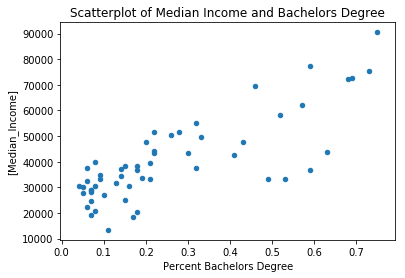

In [7]:
# Show graphs within the Python notebook use matplotlib inline command
%matplotlib inline
y_axis = ['Median_Income']
x_axis = ['Bachelors_degree']
df.plot(y = y_axis, x = x_axis, kind = 'scatter')
plt.title('Scatterplot of Median Income and Bachelors Degree')
plt.xlabel('Percent Bachelors Degree')
# Your code here
plt.show()

Run a regression model of the following form:
Report a table with all coefficient estimates including p-values.

$$\textrm{Juvenile_Arrest_Rate} = 
\beta_0 + \beta_1\textrm{Population} + \beta_2\textrm{Median_Income} + \beta_3\textrm{Unemployment} + \beta4\textrm{Education} + \beta_5\textrm{Poverty} + \epsilon $$

In [18]:
# Create a fitted model
lm = sm.ols(formula = 'Juvenile_Arrest_Rate ~ Population + Median_Income + Unemployed + Bachelors_degree + Families_in_Poverty', data = df).fit()


# Your code here: print model summary
print(lm.summary())

                             OLS Regression Results                             
Dep. Variable:     Juvenile_Arrest_Rate   R-squared:                       0.415
Model:                              OLS   Adj. R-squared:                  0.356
Method:                   Least Squares   F-statistic:                     6.963
Date:                  Thu, 17 May 2018   Prob (F-statistic):           5.55e-05
Time:                          16:53:03   Log-Likelihood:                -331.67
No. Observations:                    55   AIC:                             675.3
Df Residuals:                        49   BIC:                             687.4
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept     

Interpret the coefficient on median income. A \$1 dollar increase in median income will decrease the incarceration rate by how much? What about a \$1,000 increase?

# Your response here


In [8]:
# Enter your interpretation of the coefficient
print('A $1 increase in mediean income is associated with an average decrease in incarceration rate by .0054, holding all else constant. A $1,000 increase in median income would decrease the incarceration rate by 5.4.')


A $1 increase in mediean income is associated with an average decrease in incarceration rate by .0054, holding all else constant. A $1,000 increase in median income would decrease the incarceration rate by 5.4.
